## Creating a Graph network using python's networkx module

In [1]:
import networkx as nx # you import the networkx module obviously


G_symmetric = nx.Graph() 
# here you have multiple choices depending on the type of graph you need for the network, so far I know Graph, DiGraph & MultiGraph

G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan') # to draw an edge you simply call the add_edge() method on the graph object created above
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')

## Visualizing the network
### NB: this depends on matplot lib so if you do not have it yet run the following command:
`pip install matplotlib`

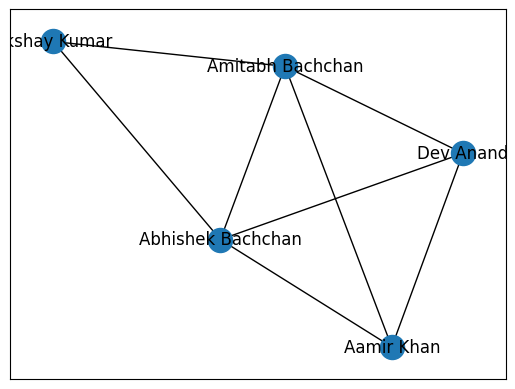

In [2]:
nx.draw_networkx(G_symmetric)

## Creating a directed graph (nx.DiGraph)

In [3]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B') # here the direction runs from first argument to the last one
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

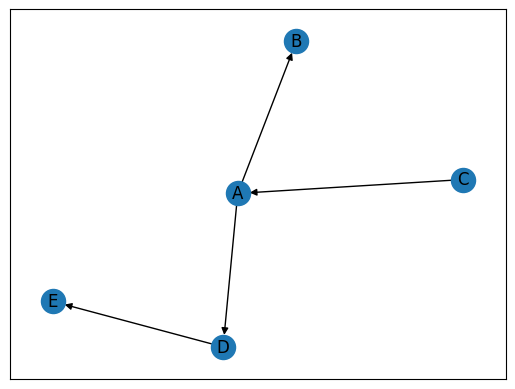

In [4]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

# Weighted Network graph creation using networkx

In [6]:
G_weighted = nx.Graph() #this creates a basic graph, other options are nx.DiGraph
G_weighted.add_edge('Amitabh Bachchan','Abhishek Bachchan', weight=15) # the weight is added when we create the edge (so convenient)
G_weighted.add_edge('Amitabh Bachchan','Aaamir Khan', weight=8)
G_weighted.add_edge('Amitabh Bachchan','Akshay Kumar', weight=11)
G_weighted.add_edge('Amitabh Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Abhishek Bachchan','Aaamir Khan', weight=4)
G_weighted.add_edge('Abhishek Bachchan','Akshay Kumar',weight=7)
G_weighted.add_edge('Abhishek Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Dev Anand','Aaamir Khan',weight=1)

## Setting different widths for the graph according to the weights

In [15]:
weights = nx.get_edge_attributes(G_weighted, 'weight').values()
max_weight = max(weights)
widths = [((weight / max_weight) * 10) for weight in weights]  # scale and increase visibility

# When drawing, the width of the edges is set according to the weights.
pos = nx.spring_layout(G_weighted)  # you can use different layout as per your requirement
nx.draw_networkx(G_weighted, pos, width=widths)


NameError: name 'nx' is not defined

## Analyzing nodes different attributes

In [8]:
nx.degree(G=G_symmetric)
# this returns the degrees of all the nodes since i didnt specify the node which i want

DegreeView({'Amitabh Bachchan': 4, 'Abhishek Bachchan': 4, 'Aamir Khan': 3, 'Akshay Kumar': 2, 'Dev Anand': 3})

## 1. Clustering

### <ins>local clustering</ins>
_"this is a fraction of a node's connections that are connected to each other as opposed to how many COULD be connected"_
- a node with a local clustering of one means all the nodes connected to it are connected to each other too
- a node with a local clustering of zero means all the nodes connected to it are not connected to any of each other

    
### <ins>average clustering</ins>
_"this is the average of all the local clusters in the graph"_
- a graph with a higher average clustering is more connected than a graph with a lower average clustering

In [9]:
print(nx.clustering(G=G_symmetric))
print(nx.average_clustering(G=G_symmetric))

{'Amitabh Bachchan': 0.6666666666666666, 'Abhishek Bachchan': 0.6666666666666666, 'Aamir Khan': 1.0, 'Akshay Kumar': 1.0, 'Dev Anand': 1.0}
0.8666666666666666


## 2. Distance

### <ins>short distance</ins>
we can find the shortest path by applying a breadth first search algorithm or djikstra's algorithm

In [14]:
# using the bfs algorithm to find the shortest path between two nodes
t = nx.bfs_tree(G=G_symmetric, source='Dev Anand')
nx.draw_networkx(t)
# using djikstra's algorithm to find the shortest path between two nodes
nx.shortest_path(G=G_symmetric, source='Dev Anand', target='Akshay Kumar', method='dijkstra') 

NameError: name 'nx' is not defined

### <ins>long distance</ins>
#### Eccentricity

- Eccentricity of a node A is defined as the largest distance between A and all other nodes.
- It can be found using nx.eccentricity() function.
- In the symmetric Actor-network, Dev Anand has an eccentricity of 2, and Abhishek Bachchan has an eccentricity of 1 (It is connected to all).

In [16]:
nx.eccentricity(G=G_symmetric) # you can get a nodes specific quantity by specifying the node as an argument


{'Amitabh Bachchan': 1,
 'Abhishek Bachchan': 1,
 'Aamir Khan': 2,
 'Akshay Kumar': 2,
 'Dev Anand': 2}

## 3. Centrality

### degree centrality
- this measure shows how many nodes a node is connected to
- `nx.degree_centrality()` however, returns a fraction of nodes a node is connected to in the whole graph

In [33]:
nx.degree_centrality(G=G_symmetric)


{'Amitabh Bachchan': 1.0,
 'Abhishek Bachchan': 1.0,
 'Aamir Khan': 0.75,
 'Akshay Kumar': 0.5,
 'Dev Anand': 0.75}

### eigenvector centrality
- this measures how many heavily connected nodes a node is directly connected to

In [1]:
dict(nx.eigenvector_centrality(G=G_symmetric))

NameError: name 'nx' is not defined

### betweenness centrality
- The Betweenness Centrality is the centrality of control. 
- It represents the frequency at which a point occurs on the geodesic (shortest paths) that connected pair of points. 
- It quantifies how many times a particular node comes in the shortest chosen path between two other nodes. 
- The nodes with high betweenness centrality play a significant role in the communication/information flow within the network. 
- The nodes with high betweenness centrality can have a strategic control and influence on others. 
- An individual at such a strategic position can influence the whole group, by either withholding or coloring the information in transmission.

- Networkx has the function: \
`betweenness_centrality()`\
 to measure it for the network. It has options to select if we want betweenness values to be normalized or not, weights to be included in centrality calculation or not, and to include the endpoints in the shortest path counts or not.



In [17]:
nx.betweenness_centrality(G=G_symmetric)

{'Amitabh Bachchan': 0.16666666666666666,
 'Abhishek Bachchan': 0.16666666666666666,
 'Aamir Khan': 0.0,
 'Akshay Kumar': 0.0,
 'Dev Anand': 0.0}

### radius

- suppose in our graph, we have the eccentricities of all the nodes, we take the minimum eccentric and that becomes the radius of the graph
- if we were to centre our graph from the node with the lowest eccentric, the longest path from that node to its most outter reach node becomes the radius 

In [5]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        left = [item for item in arr[1:] if item<=pivot]
        right = [item for item in arr[1:] if item>pivot]
        return quicksort(left) + [pivot] + quicksort(right)
    

print(quicksort([2,0,8,7,3,6]))

[0, 2, 3, 6, 7, 8]


In [4]:
def quicksort(array):
    if len(array) < 2:
        return array
    else:
        #Base case: arrays with 0 or 1 element are already “sorted.” Recursive case
        pivot = array[0]
        less = [i for i in array[1:] if i <= pivot]
        #Sub-array of all the elements less than the pivot
        #Sub-array of all the elements greater than the pivot
        greater = [i for i in array[1:] if i > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)
        
print(quicksort([10, 5, 2, 3]))

[2, 3, 5, 10]


In [13]:
# word in list and compare with the last word in list
#for item in word
# item vs the corresponding





def palindrome(word: str):
    control = -1
    while control != -len(word):
        for i in word:
            if i != word[control]:
                return "not a palindrome"
            control = control-1  
        return "is palindrome"    
      

print(palindrome("rr"))

is palindrome


In [12]:
lis = [30,69,12,33,420,1]
m = max(lis)
print(m)

420


In [9]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
